# Importing necessary libraries

In [3]:
#importing the basic library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sk learn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


# to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# List of steps:
- Step-1: Reading & Understanding Data
- Step-2: Data Cleaning / Pre-processing
- Step-3: EDA
- Step-4: Dummy variable creation
- Step-5: Train-Test Split
- Step-6: Scaling
- Step-7: Model building using RFE
- Step-8: Residual analysis
- Step-9: Evaluation & Predictions

# Reading & Understanding Data

#### Loading the Dataset

In [4]:
df=pd.read_csv('Bike_Sharing_Dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding the dataset

In [5]:
df.shape

(730, 16)

Dataset has 730 rows & 16 columns.

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data Cleaning
- Dropping unnecessary columns :
    - 'casual' & 'registered' , as the summation of these two variables gives us 'cnt'.
    - 'instant' as it's just an index column 
    - 'dteday' as the parts of date are already present in the dataset like year, month and weekday
- Checking for missing values
- Mapping values of categorical variables :
    <!-- Type "&nbsp;" to add a single space. Type "&ensp;" to add 2 spaces. Type "&emsp;" to add 4 spaces. -->
    - 'season' column values to their actual seasons i.e., 
        <br> 
        &emsp;
        { &ensp; 1: spring, &ensp; 2: summer, &ensp; 3: fall, &ensp; 4: winter &ensp; }
    - 'month' column values to their actual months i.e., 
        <br> 
        &emsp;
        { &ensp; 1: jan, &ensp; 2: feb, &ensp; 3: mar, &ensp; 4: apr, &ensp; 5: may, &ensp; 6: jun,
          &ensp; 7: jul, &ensp; 8: aug, &ensp; 9: sep, &ensp; 10: oct, &ensp; 11: nov, &ensp; 12: dec &ensp; }
    - 'weekday' column values to their weekday names i.e.,
        <br> 
        &emsp;
        { &ensp; 0: sun, &ensp;  1: mon, &ensp; 2: tue, &ensp;  3: wed, &ensp;  4: thu, &ensp;  5: fri, &ensp;  6: sat &ensp; }
    - 'weathersit' column values to below categories : 
        <br> 
        &emsp;
        { &ensp; 1: Clear, &ensp;  2: Misty, &ensp;  3: Snowy, &ensp;  4: Stormy &ensp; }
- Outlier Detection
    

### Dropping Columns

In [8]:
df.drop(['casual','registered', 'instant','dteday'],axis=1,inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Checking for missing values

In [9]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Converting categorical column values to a more readable format

In [10]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'},inplace = True)
df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'},inplace = True)
df.weathersit.replace({1:'clear', 2:'misty', 3:'snowy', 4:'stormy'},inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Outlier Detection

So from the below plots it is clear that we don't have any outliers.


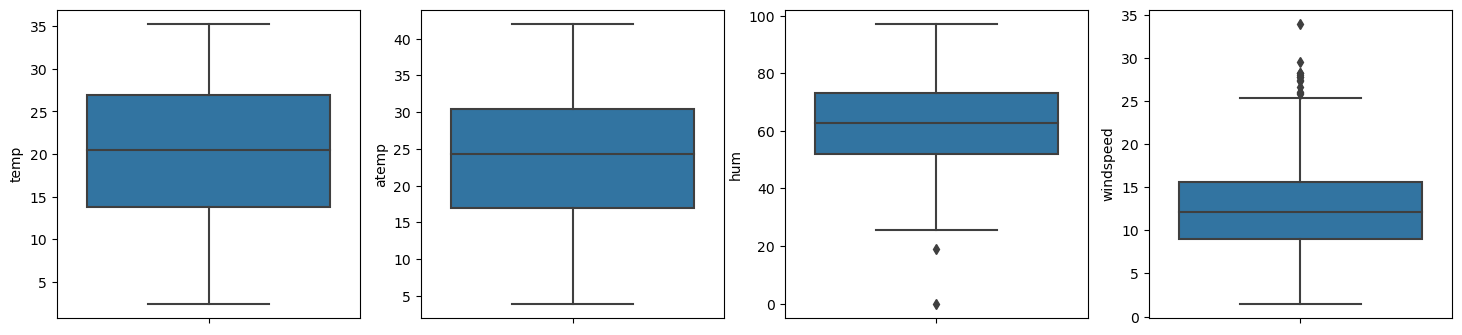

In [12]:
# Outlier test for the columns 'temp', 'atemp', 'hum', & 'windspeed'.

plt.figure(figsize=(18,4))

i = 1
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

print("So from the below plots it is clear that we don't have any outliers.")

### Inspecting the data after cleaning

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Exploratory Data Analysis (EDA)

## Drawing paiplots to check for linear relationship

<Figure size 600x800 with 0 Axes>

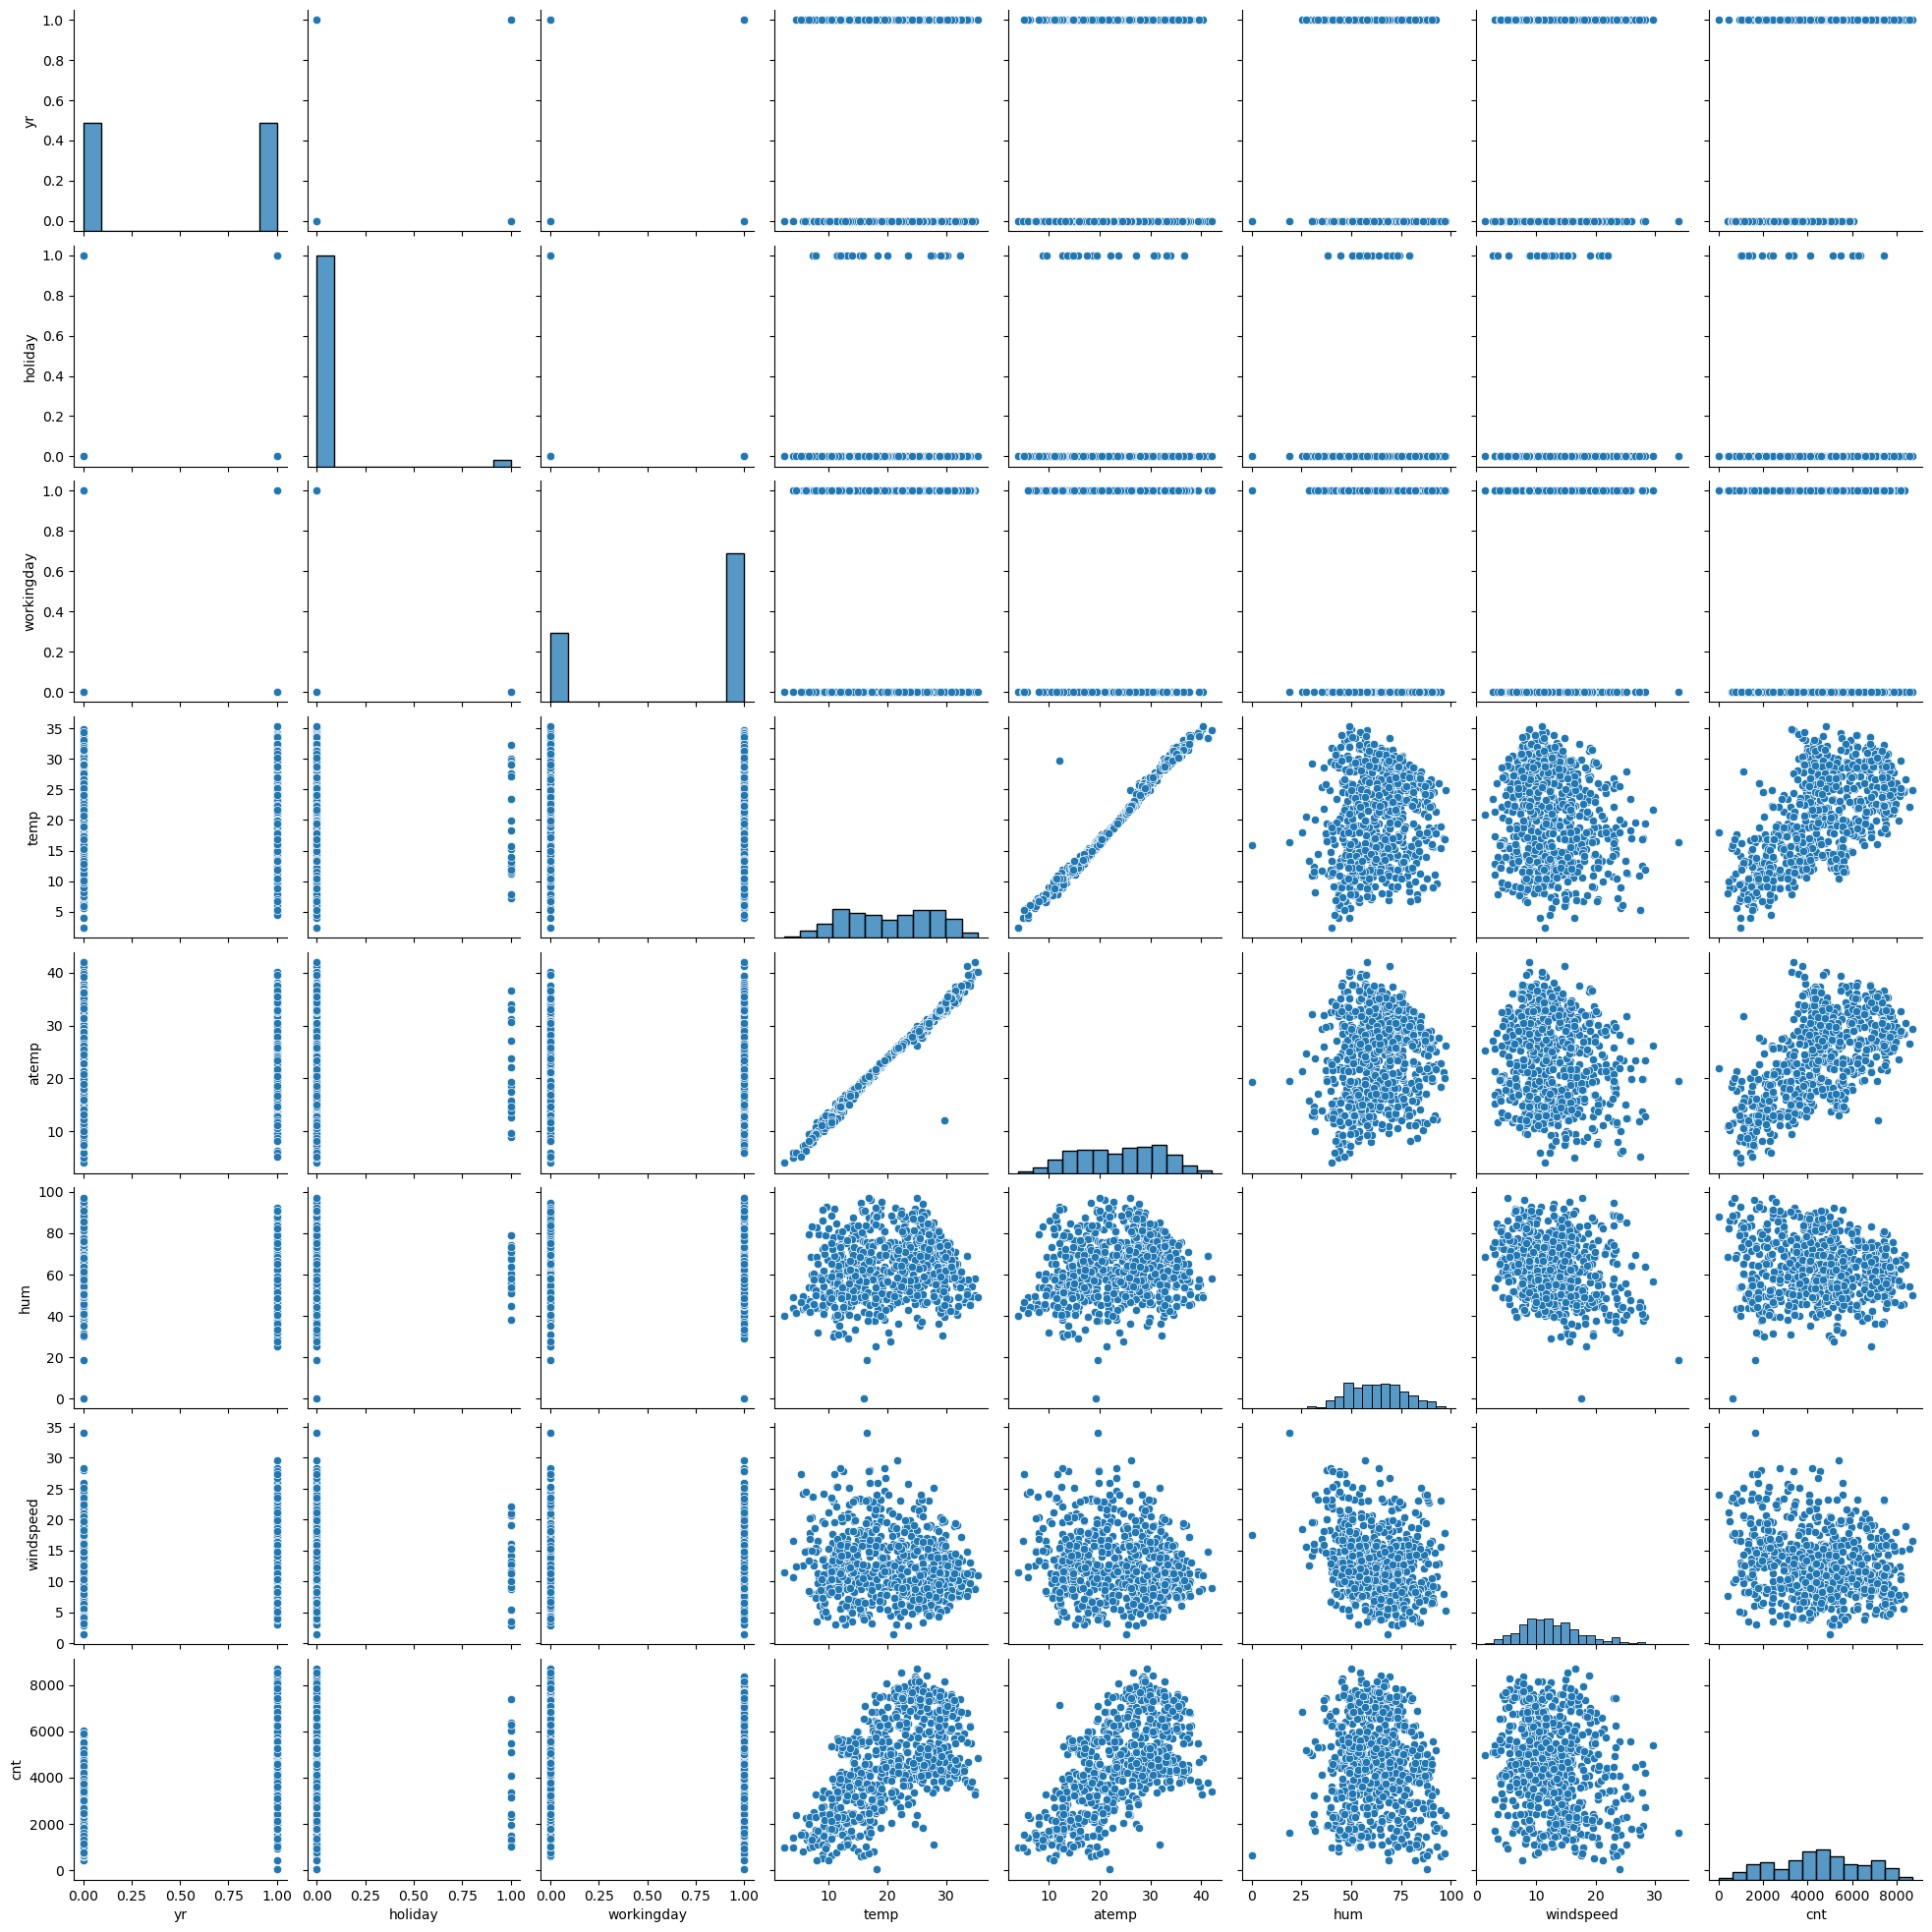

In [16]:
plt.figure(figsize = (6,8))
sns.pairplot(data=df)
plt.show()

## Heatmap for correlation between numeric variables

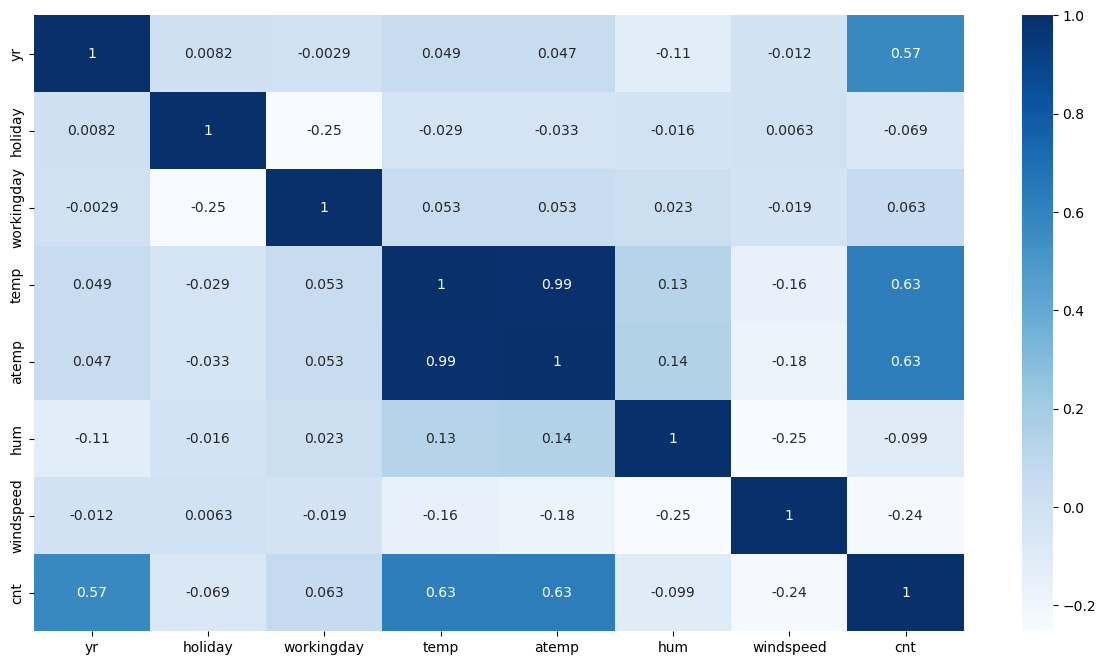

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

- So from the above plots we can clearly see that 'temp' and 'atemp' are having high correlation.
- We can see 'cnt' also have positive correlation with 'temp' & 'atemp'

## Analysing the categorical variables

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


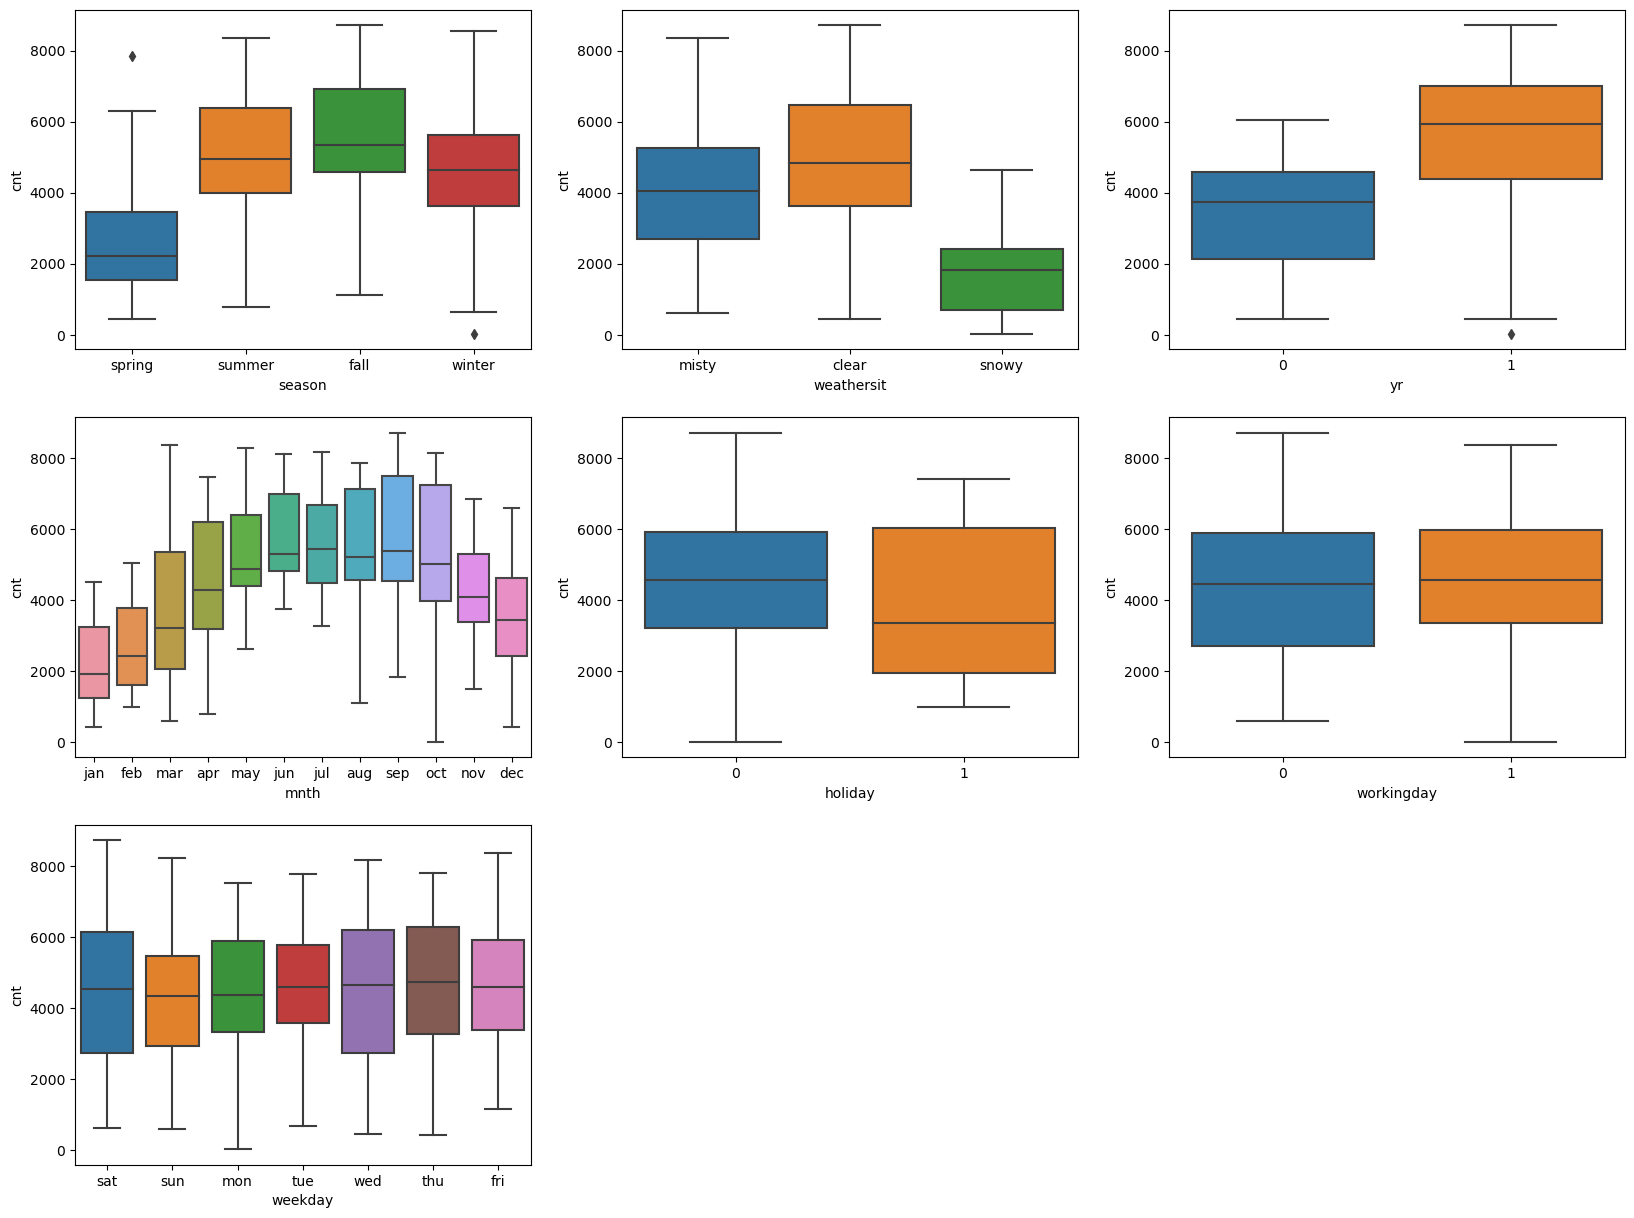

In [19]:
# Plot box-plots for all the categorical variables season,  weathersit, yr, mnth, weekday, workingday, holiday

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='weekday',y='cnt',data=df)


plt.show()

Below are the inferences from the above box-plots:
- Fall has the highest no. of users & spring has the lowest which also applies for their respective months
- Increase in the usage if weathersit is clear & less if snowy, which implies demand increases when weather gets better
- Increase in the usage of rental bikes compared to previous year
- Bikes are rented more in regular/working days than in holidays



# Creating Dummy Variables

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df = pd.get_dummies(data=df, columns=["season", "mnth", "weekday", "weathersit"], drop_first=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty,weathersit_snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_misty', 'weathersit_snowy'],
      dtype='object')

# Tain-test-split

In [23]:
print("Dataframe-dimensions before split : ", df.shape)

Dataframe-dimensions before split :  (730, 30)


In [24]:
# y to contain only target variable
y = df.pop('cnt')

# X contains all the remaining independent variables
X = df

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
print("Shape of \n train data: ", X_train.shape,"\n test data: ", X_test.shape)

Shape of 
 train data:  (511, 29) 
 test data:  (219, 29)


In [26]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty,weathersit_snowy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,20.550310,24.009242,63.482145,12.598001,0.230920,0.258317,0.250489,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.346380,0.029354
std,0.500067,0.163398,0.470935,7.476797,8.112525,13.939855,4.965253,0.421834,0.438138,0.433719,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.476282,0.168963
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.079626,17.407600,52.848700,9.041918,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.354153,25.410200,64.041700,11.791732,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.940424,30.556050,73.458300,15.583497,0.000000,1.000000,0.500000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,28.250014,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scaling

In [27]:
# Scaling the continuous variables excluding variables with binary values
scalable_vars = ['temp','atemp','hum','windspeed']

# Using Normalized scaler
scaler = MinMaxScaler()

# Applying fit and transform only on training set 
X_train[scalable_vars] = scaler.fit_transform(X_train[scalable_vars])


In [28]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty,weathersit_snowy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,1,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,0,1,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [29]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty,weathersit_snowy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.346380,0.029354
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.476282,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


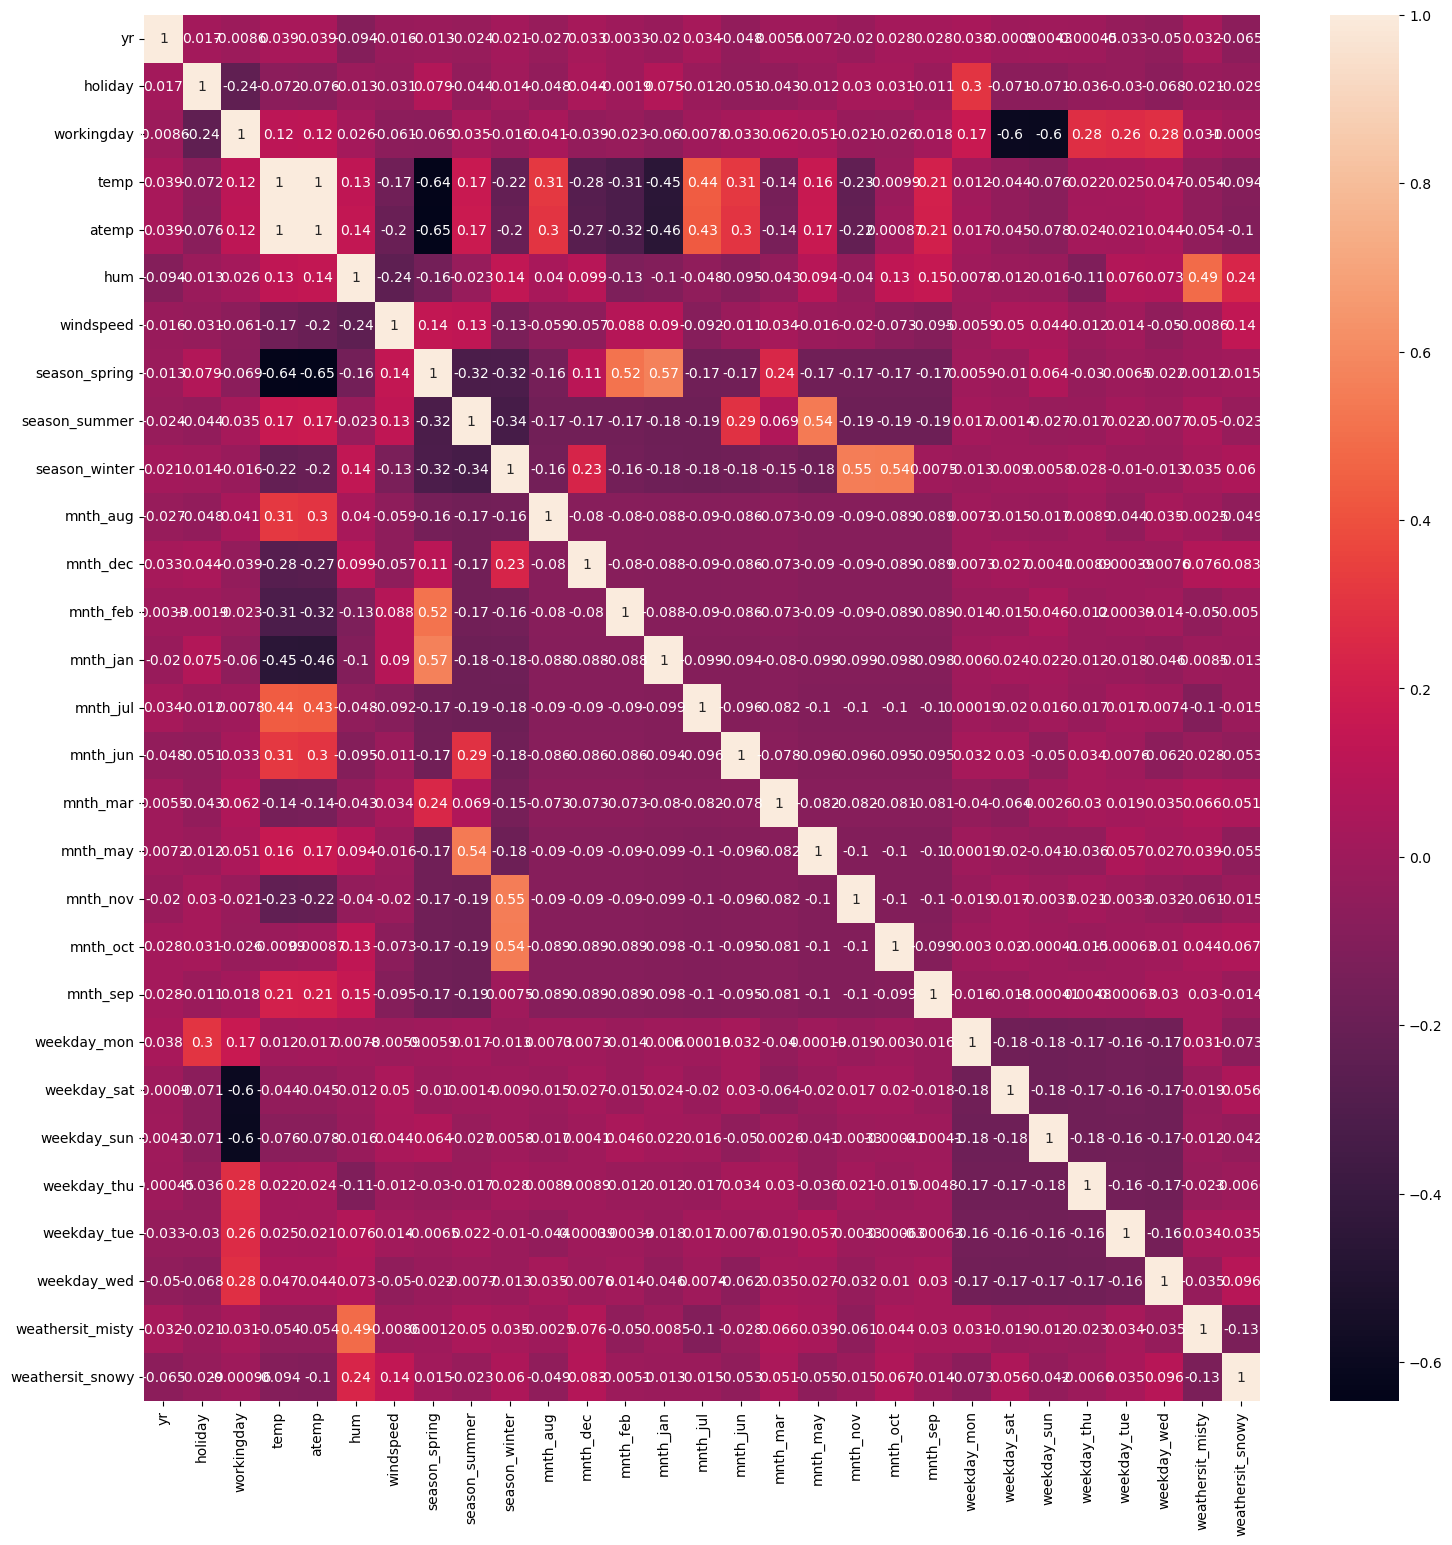

In [30]:
# Checking for the correlation of variables
plt.figure(figsize = (18, 18))  
sns.heatmap(X_train.corr(), annot = True)
plt.show()

# Model Building using RFE ( Recursive Feature Elimination )

In [31]:
# Initialising the linear regression model object
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [32]:
# Cutting down the number of features to 15 using automated approach
rfe = RFE(lrm, n_features_to_select=18, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [33]:
# List of columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 11),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 9),
 ('weathersit_misty', True, 1),
 ('weathersit_snowy', True, 1)]

In [34]:
# Custom function to build a model using statsmodel api

def build_model(feature_cols):

    # Adding intercept term to the model
    X_train_sm = sm.add_constant(X_train[feature_cols])

    # Fitting the model
    lr_model = sm.OLS(y_train, X_train_sm).fit()

    # Printing the summary of the model
    print(lr_model.summary())

    return lr_model

In [35]:
# Custom function to calculate VIF's and printing them 
# params - columns for which VIF to be calcualted
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [36]:
# Feature variables selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy'],
      dtype='object')

In [37]:
# Feature variables not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [38]:
# Taking 18 columns supported by rfe for training
X_train_rfe = X_train[X_train.columns[rfe.support_]]
print(X_train_rfe.columns)
print("Shape of X_train_rfe: ", X_train_rfe.shape)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy'],
      dtype='object')
Shape of X_train_rfe:  (511, 18)


In [39]:
correlation_matrix = X_train_rfe.corr()
print(correlation_matrix)

                        yr   holiday  workingday      temp     atemp  \
yr                1.000000  0.017094   -0.008554  0.038983  0.038834   
holiday           0.017094  1.000000   -0.238757 -0.071853 -0.075670   
workingday       -0.008554 -0.238757    1.000000  0.116595  0.120252   
temp              0.038983 -0.071853    0.116595  1.000000  0.996580   
atemp             0.038834 -0.075670    0.120252  0.996580  1.000000   
hum              -0.094438 -0.012587    0.026340  0.130488  0.140462   
windspeed        -0.016092 -0.031014   -0.061337 -0.170518 -0.196159   
season_spring    -0.013243  0.078717   -0.068840 -0.638240 -0.646149   
season_winter     0.021425  0.013644   -0.016006 -0.220531 -0.203766   
mnth_dec          0.033133  0.043816   -0.038565 -0.275473 -0.268664   
mnth_jul          0.034351 -0.011933    0.007830  0.435619  0.431473   
mnth_mar          0.005537 -0.043380    0.061516 -0.144658 -0.141220   
mnth_may          0.007242 -0.011933    0.051010  0.162796  0.16

## Model-1 : 

In [40]:
# All the columns supported by rfe model
model1_cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy']

build_model(model1_cols)
print("\n")
get_vif(model1_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.56e-186
Time:                        23:51:29   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     492   BIC:                             8348.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2896.7949    311.100  

## Model-2 :

In [41]:
# Dropping the feature 'temp' as it has high p-value & high VIF value
model2_cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy']

build_model(model2_cols)
print("\n")
get_vif(model2_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.33e-187
Time:                        23:51:29   Log-Likelihood:                -4114.9
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     493   BIC:                             8342.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2891.0287    310.549  

## Model-3 : 

In [42]:
# Dropping the feature 'holiday' as it has high p-value & low VIF value
model3_cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy']

build_model(model3_cols)
print("\n")
get_vif(model3_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.55e-188
Time:                        23:51:29   Log-Likelihood:                -4115.9
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     494   BIC:                             8338.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2842.2812    308.761  

## Model-4 : 

In [43]:
# Dropping the feature 'hum' as it has low p-value & high VIF value
model4_cols = ['yr', 'workingday', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy']

build_model(model4_cols)
print("\n")
get_vif(model4_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.72e-185
Time:                        23:51:29   Log-Likelihood:                -4125.3
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     495   BIC:                             8350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2030.7604    249.317  

## Model-5 : 

In [44]:
# Dropping the feature 'mnth_may' as it has high p-value & low VIF value
model5_cols = ['yr', 'workingday', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty',
       'weathersit_snowy']

build_model(model5_cols)
print("\n")
get_vif(model5_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.73e-186
Time:                        23:51:29   Log-Likelihood:                -4126.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2091.2970    247.000  

## Model-6 : 

In [45]:
# Dropping the feature 'mnth_jul' instead of 'atemp' (even though it has low p-value & high VIF value)
# as they are significantly correlated(0.43) and 'atemp' is more intuitive to understand
model6_cols = ['yr', 'workingday', 'windspeed', 'atemp', 'season_winter', 'mnth_dec', 'season_spring', 'mnth_mar',
       'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty', 'weathersit_snowy']

build_model(model6_cols)
print("\n")
get_vif(model6_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.83e-185
Time:                        23:51:29   Log-Likelihood:                -4130.9
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     497   BIC:                             8349.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2202.3983    245.644  

## Model-7 : 

In [46]:
# Dropping the feature 'windspeed' instead of 'atemp' (even though it has low p-value & high VIF value)
# because they are moderately correlated(-0.196) and 'atemp' is more intuitive to understand
model7_cols = ['yr', 'workingday', 'atemp', 'season_winter', 'mnth_dec', 'mnth_mar', 'season_spring',
       'mnth_nov', 'mnth_sep', 'weekday_sat', 'weathersit_misty', 'weathersit_snowy']

build_model(model7_cols)
print("\n")
get_vif(model7_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.07e-184
Time:                        23:51:29   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1797.6797    213.072  

## Summary : 
#### From the above model statistics we can see that, 
    - VIF is in the accepted range. 
    - p-value for all the features is almost 0.0 
    - R2 is 0.832 & Adj-R2 is 0.828 which are similar enough. 
Hence we can finalize this model for our predictions

## Building the Final Model with the selected features

In [47]:
# Function to build our final model
def final_model_build(X, y):
    lr_final = LinearRegression()
    lr_final.fit(X,y)
    return lr_final

In [48]:
lr_model_final = final_model_build(X_train[model7_cols], y_train)
print("Intercept : ", lr_model_final.intercept_, "\nCo-eff's : " ,lr_model_final.coef_)

Intercept :  1797.6796853096175 
Co-eff's :  [ 1998.03354364   415.52511847  3451.0983976    788.23746802
  -552.97378526   480.28172555 -1330.76686938  -730.40365995
   528.36793306   464.60675896  -690.71767257 -2391.77742443]


# Residual Analysis

In [49]:
y_train_pred = lr_model_final.predict(X_train[model7_cols])

In [50]:
# Function to plot histogram of the error terms
def plot_res_dist(actual, pred):
    sns.distplot(actual - pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

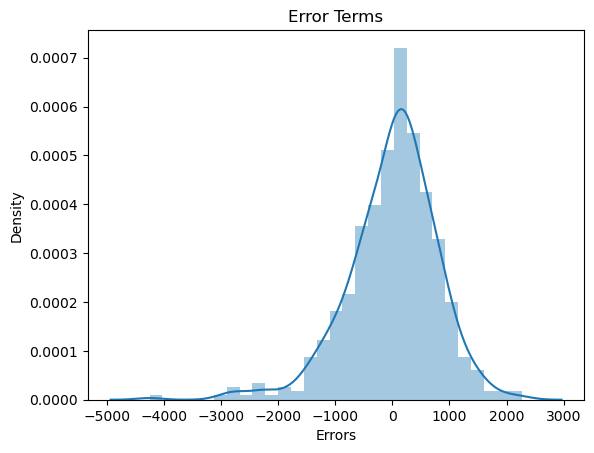

In [51]:
plot_res_dist(y_train, y_train_pred)

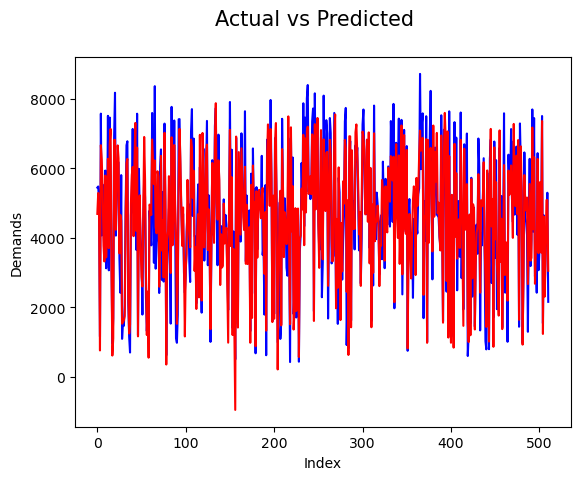

In [52]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Evaluations & Predictions of the Model

## Evaluating the model

In [53]:
# R-squared Value of trained data
print('R-squared value of test data: ', r2_score(y_train, y_train_pred))

R-squared value of test data:  0.8324910604697825


In [54]:
# Scaling variables of the test data excluding variables with binary values
vars_to_scale = ['temp', 'atemp', 'hum', 'windspeed']

#Test data to be transformed only, no fitting
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale]) 

In [55]:
#Predicting test data values
y_test_pred = lr_model_final.predict(X_test[model7_cols])

In [56]:
# R-squared value of test data
print('R-squared value of test data: ', r2_score(y_test, y_test_pred))

R-squared value of test data:  0.8073138699676583


In [57]:
# Evaluating the model based on r2_score
y_pred = y_test_pred
r2_score(y_test, y_pred)

0.8073138699676583

## Predicting the model

Text(0, 0.5, 'y_pred')

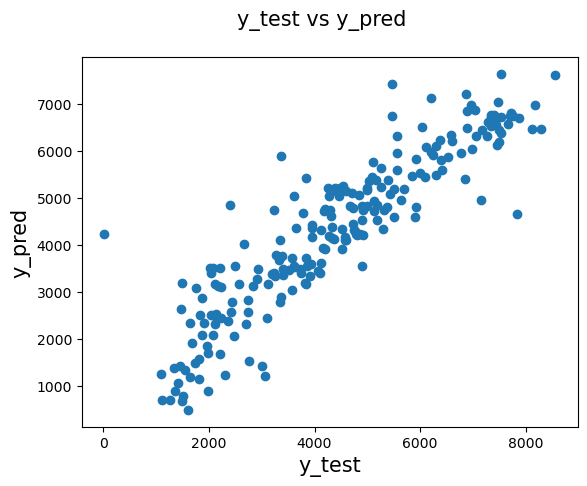

In [58]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_pred', fontsize = 15) 

# Conclusion 

In [59]:
build_model(model7_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.07e-184
Time:                        23:51:32   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1797.6797    213.072  

#### Below are the significant variables to predict the demand for shared bikes

- Working day
- atemp
- Seasons (winter & spring)
- Months (March, September, November, December)
- Weekday (Saturday)
- Weathersit (Misty+Cloudy, Light Snow)
- Year